In [4]:
# read the file as a table
# it doesn't work with pandas read_table method

import pandas as pd

df = pd.read_table("Data/LAST DATA.txt")
df

,FN Clarivate Analytics Web of Science
0,VR 1.0
1,PT J
2,"AU Abdulsalam, AA"
3,"Bashour, HN"
4,"Monem, FS"
...,...
32806,GA ML977
32807,UT WOS:A1981ML97700009
32808,DA 2020-02-10
32809,ER


In [106]:
# number of articles in the Dataset

with open("Data/LAST DATA.txt", "r", encoding='utf-8') as f:
    
    n_article=0
    for line in f:
        if line.startswith("AF"):
            #print(line)
            n_article +=1
print(f"There are {n_article} articles in the dataset.")                

There are 418 articles in the dataset.


In [107]:
# finding out authors
# each author is the value of i'th key of the dictionary 

with open("Data/LAST DATA.txt", "r", encoding='utf-8') as f:
    
    af_counter=False
    index =0
    af_dict={}
    
    for line in f:
        
        if line.startswith("AF"):
            af_dict[index] = line[3:].strip()
            index +=1
            af_counter= True
            continue
        
        if line.startswith("TI"):
            af_counter=False
            continue
        
        if af_counter:
            af_dict[index] = line[3:].strip()
            index +=1

In [108]:
# turning the dictionary to a pandas Series object

af = pd.Series(af_dict)
print(af)

0            Abdulsalam, AA
1               Bashour, HN
2                 Monem, FS
3               Hamadeh, FM
4             Acicbe, Oznur
               ...         
1259         Magarati, Maya
1260      Jackson, J. Carey
1261    Taylor, Victoria M.
1262            [Anonymous]
1263            [Anonymous]
Length: 1264, dtype: object


In [109]:
print(f"There are {n_article} articles written by {len(af)} authors in the dataset.")

There are 418 articles written by 1264 authors in the dataset.


In [110]:
# finding out frequencies of data and print out top 20 in ascending order

af_counts =af.value_counts(ascending=True).tail(20)
af_counts

Saadi, Altaf                 4
Ussher, Jane M.              5
Liamputtong, Pranee          5
Hawkey, Alexandra J.         5
Silka, Linda                 5
Rogers, Beatrice Lorge       5
Wilde, Parke E.              5
Bond, Barbara                5
Bermudez, Odilia I.          5
Peterman, Jerusha Nelson     5
Freedman, J                  6
Gerard, A                    6
Percac-Lima, Sanja           6
Wadia, Khursheed             6
Perz, Janette                6
Allwood, Gill                6
Edward, JK                   7
Lenette, Caroline            8
Allwood, G                  12
Wadia, K                    12
dtype: int64

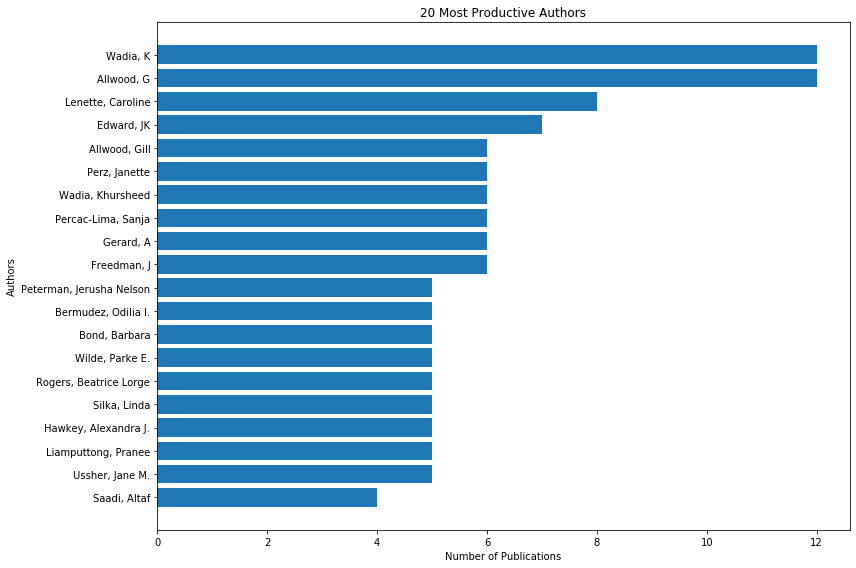

In [111]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

# use plt.barh method for horizontal bar
ax.barh(af_counts.index, af_counts)  

# add labels
plt.ylabel("Authors")
plt.xlabel("Number of Publications")

# add Title
plt.title("20 Most Productive Authors") 

# arange padding
plt.tight_layout()

# display the plot
plt.show()

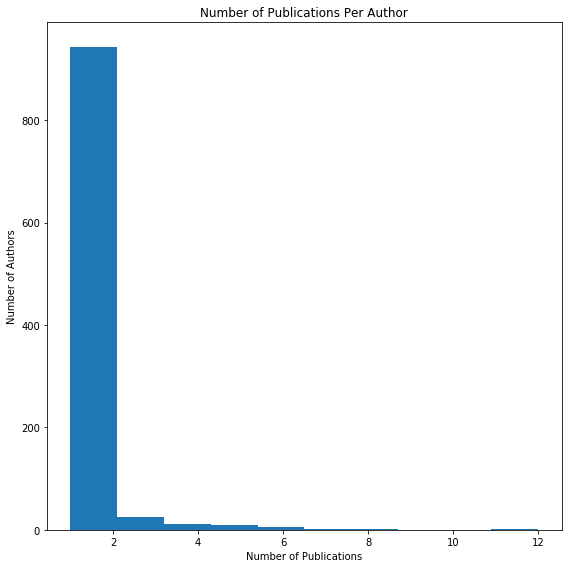

In [112]:
af_counts_1 =af.value_counts()
af_counts_1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))

# use plt.barh method for horizontal bar
ax.hist(af_counts_1) 

# add labels
plt.ylabel("Number of Authors")
plt.xlabel("Number of Publications")

# add Title
plt.title("Number of Publications Per Author") 

# arange padding
plt.tight_layout()

plt.show()

In [2]:
# finding out citations
# each citation is the value of i'th key of the dictionary 

with open("Data/LAST DATA.txt", "r", encoding='utf-8') as f:
    
    cr_counter=False
    index =0
    cr_dict={}
    
    for line in f:
        
        if line.startswith("CR"):
            cr_dict[index] = line[3:].strip()
            index +=1
            cr_counter= True
            continue
        
        if line.startswith("NR"):
            cr_counter=False
            continue
        
        if cr_counter:
            cr_dict[index] = line[3:].strip()
            index +=1

In [5]:
# turning the dictionary to a pandas Series object

cr = pd.Series(cr_dict)
print(cr)

0                ALUOCH JR, 1990, TROP GEOGR MED, V42, P28
1        BAILL IC, 1990, INT J GYNECOL OBSTET, V33, P19...
2        BLATTNER P, 1977, JAMA-J AM MED ASSOC, V238, P...
3        Cronin EK, 2000, BRIT J OBSTET GYNAEC, V107, P...
4        ELSHAFEI AM, 1992, BRIT J OBSTET GYNAEC, V99, ...
                               ...                        
13864                Strauss A, 1998, BASICS QUALITATIVE R
13865    Taylor VM, 2002, J NATL CANCER I, V94, P670, D...
13866    Tsui J, 2007, J WOMENS HEALTH, V16, P1447, DOI...
13867    Yun K, 2016, J COMMUN HEALTH, V41, P526, DOI 1...
13868    Yun K, 2012, J IMMIGR MINOR HEALT, V14, P933, ...
Length: 13869, dtype: object


In [6]:
print(f"The dataset contains {len(cr)} citations.")

The dataset contains 13869 citations.


In [62]:
import re
import numpy as np

cr_citation_dict = {}
index=0
for line in cr:
    pattern = re.match(r"[\w\s*&-/`'()\[\],.]*\s\d{4}", line)
    if pattern:
        cr_citation_dict[index] = pattern.group()
        index +=1
    
cr_citation = pd.Series(cr_citation_dict)
cr_citation.dropna(inplace = True)
cr_citation

0          ALUOCH JR, 1990
1           BAILL IC, 1990
2         BLATTNER P, 1977
3          Cronin EK, 2000
4        ELSHAFEI AM, 1992
               ...        
13686      Strauss A, 1998
13687      Taylor VM, 2002
13688         Tsui J, 2007
13689          Yun K, 2016
13690          Yun K, 2012
Length: 13691, dtype: object

In [63]:
# finding out frequencies of data and print out top 20 in ascending order

cr_citation_counts =cr_citation.value_counts(ascending=True).tail(20)
cr_citation_counts

Morrow M, 2008             8
Pottie K, 2011             8
Marshall GN, 2005          8
Ager A, 2008               8
MOLLICA RF, 1992           8
Bartolomei L, 2014         8
Creswell J. W, 2009        8
Khawaja NG, 2008           9
Indra Doreen, 1999         9
Gagnon AJ, 2013            9
Fazel M, 2005              9
Pavlish CL, 2010          10
Schweitzer R, 2006        10
Baird MB, 2012            10
UNHCR, 2014               10
Collins CH, 2011          10
UNHCR, 2011               10
Barnes DM, 2004           12
Carroll Jennifer, 2007    12
Braun V., 2006            14
dtype: int64

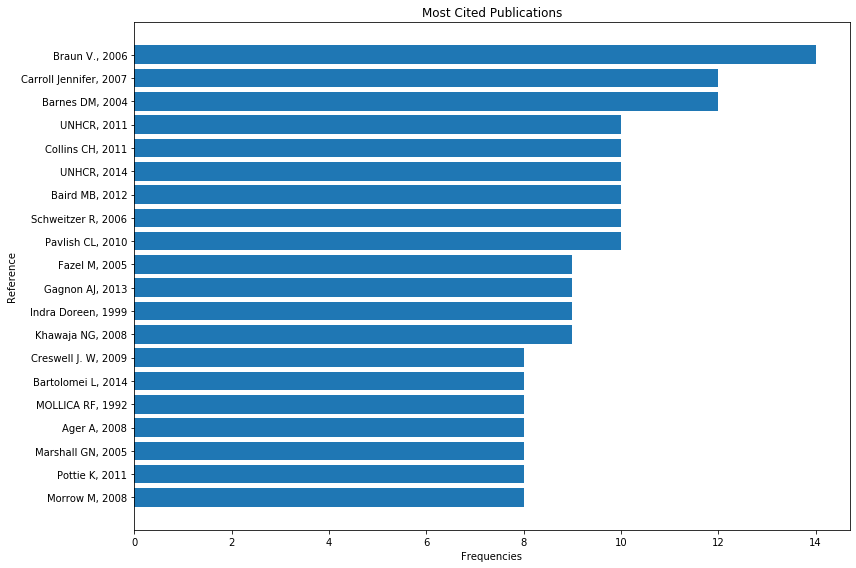

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

# use plt.barh method for horizontal bar
ax.barh(cr_citation_counts.index, cr_citation_counts)  

# add labels
plt.ylabel("Reference")
plt.xlabel("Frequencies")

# add Title
plt.title("Most Cited Publications") 

# arange padding
plt.tight_layout()

# display the plot
plt.show()

In [121]:
# finding out Publication Years
# each Publication Year is the value of i'th key of the dictionary 

with open("Data/LAST DATA.txt", "r", encoding='utf-8') as f:
    
    index =0
    py_dict={}
    
    for line in f:
        
        if line.startswith("PY"):
            py_dict[index] = line[3:].strip()
            index +=1


In [122]:
# turning the dictionary into a pandas Series object

py = pd.Series(py_dict)

# change the type to datetime year
py = pd.to_datetime(py, format='%Y').dt.year

# find out frequeincies
py_counts = py.value_counts()
py_counts.sort_index(inplace= True)

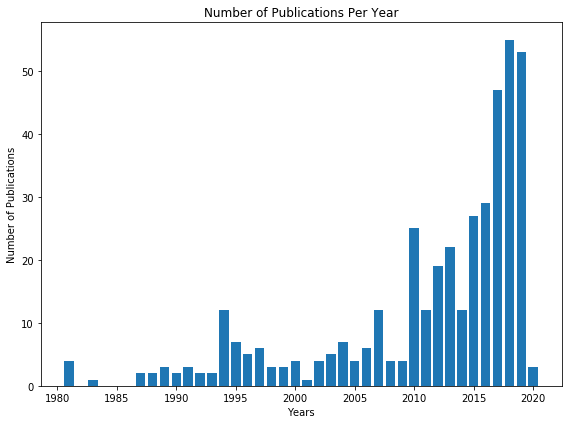

In [123]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

# use plt.bar method for vertical bars
ax.bar(py_counts.index, py_counts)  

# add labels
plt.ylabel("Number of Publications")
plt.xlabel("Years")

# add Title
plt.title("Number of Publications Per Year") 

# arange padding
plt.tight_layout()

# display the plot
plt.show()

In [111]:
# finding out Source
# each Source is the value of i'th key of the dictionary 

with open("Data/LAST DATA.txt", "r", encoding='utf-8') as f:
    
    so_counter=False
    index =0
    so_dict={}
    
    for line in f:
        
        if line.startswith("SO"):
            so_dict[index] = line[3:].strip()
            index +=1

In [113]:
# turning the dictionary into a pandas Series object

so = pd.Series(so_dict)

# finding out frequencies of data and print out top 10 in ascending order
so_counts = so.value_counts(ascending=True).tail(10)
so_counts

JOURNAL OF REFUGEE STUDIES                   5
ADVANCES IN NURSING SCIENCE                  5
INTERNATIONAL SOCIAL WORK                    5
JOURNAL OF GENERAL INTERNAL MEDICINE         5
GENDER PLACE AND CULTURE                     6
REFUGEE WOMEN IN BRITAIN AND FRANCE          7
INTERNATIONAL MIGRATION                      7
EUROPEAN PSYCHIATRY                          7
EUROPEAN JOURNAL OF PUBLIC HEALTH           10
JOURNAL OF IMMIGRANT AND MINORITY HEALTH    17
dtype: int64

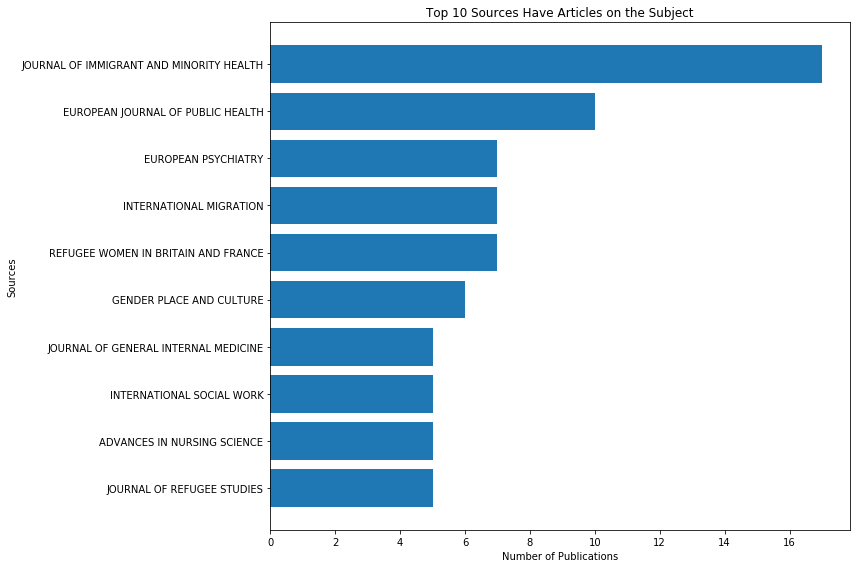

In [120]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

# use plt.bar method for vertical bars
ax.barh(so_counts.index, so_counts)  

# add labels
plt.xlabel("Number of Publications")
plt.ylabel("Sources")

# add Title
plt.title("Top 10 Sources Have Articles on the Subject") 

# arange padding
plt.tight_layout()

# display the plot
plt.show()

In [71]:
# finding out citations
# each citation is the value of i'th key of the dictionary 
import pandas as pd

with open("Data/LAST DATA.txt", "r", encoding='utf-8') as f:
    
    cr_counter=False
    n_article=0
    index =0
    cmb_cr={}
    cmb_py={}
    
    for line in f:

        # each new publication starts with PT and count them 
        if line.startswith("PT"):
            n_article += 1
            continue
        
        # citation rows of each publication starts with PT
        # add them to the dictionary with new index 
        if line.startswith("CR"):
            cmb_cr[index] = [line[3:].strip(), n_article]
            index +=1
            cr_counter= True
            continue
        
        # the very next row after citation is NR
        # then stop adding items to the dictionary 
        if line.startswith("NR"):
            cr_counter=False
            continue
        
        # if the row is between "CR" and "NR" add rows to the dictionary
        if cr_counter:
            cmb_cr[index] = [line[3:].strip(), n_article]
            index +=1
        
        # publication years of each publication starts with PT
        # add PY to each citation of the current article it iterates over   
        if line.startswith("PY"):
            py = line[3:].strip()
            
            for key,value in cmb_cr.items():
                if value:
                    if value[1]==n_article:
                        value.append(py)
                        

In [72]:
# simplify the citation column with regex
# replace the ex,isting citation with the simplified value

import re 

for key, value in cmb_cr.items():
    pattern = re.match(r"[\w\s*&-/`'()\[\],.]*\s(19|20)\d{2}", value[0])
    
    if pattern:
        value[0] =pattern.group()
        

# turn dictionary into a dataframe
cmb = pd.DataFrame.from_dict(cmb_cr, columns=["Citation", "Number of Article", "Publication Year"], orient='index')
cmb.dtypes

Citation             object
Number of Article     int64
Publication Year     object
dtype: object

In [73]:
# print None values

print(cmb.isnull().sum())

null_columns=cmb.columns[cmb.isnull().any()]
print(cmb[cmb["Publication Year"].isnull()][null_columns])

Citation               0
Number of Article      0
Publication Year     274
dtype: int64
      Publication Year
5257              None
5258              None
5259              None
5260              None
5261              None
...                ...
11484             None
11485             None
11486             None
11487             None
11488             None

[274 rows x 1 columns]


In [74]:
# drop rows that have no publication years 

cmb.dropna(inplace=True)
cmb

,Citation,Number of Article,Publication Year
0,"ALUOCH JR, 1990",1,2003
1,"BAILL IC, 1990",1,2003
2,"BLATTNER P, 1977",1,2003
3,"Cronin EK, 2000",1,2003
4,"ELSHAFEI AM, 1992",1,2003
...,...,...,...
13864,"Strauss A, 1998",416,2017
13865,"Taylor VM, 2002",416,2017
13866,"Tsui J, 2007",416,2017
13867,"Yun K, 2016",416,2017


In [75]:
# change the type to datetime year

cmb["Publication Year"] = pd.to_datetime(cmb["Publication Year"]).dt.year
cmb.dtypes

Citation             object
Number of Article     int64
Publication Year      int64
dtype: object

In [76]:
# add a cloumn shows whether the publication year is less than 2000

import numpy as np
cmb["Period 1"] = np.where((cmb["Publication Year"] <=2015) & (cmb["Publication Year"] >=2010), 1, 0)
cmb["Period 2"] = np.where(cmb["Publication Year"] >=2016, 1, 0)

In [78]:
# show citations of publications published before 2000   

cmb[cmb["Period 2"]==1]

,Citation,Number of Article,Publication Year,Period 1,Period 2
16,"Abdulcadir J, 2016",3,2019,0,1
17,"Agbemenu K, 2018",3,2019,0,1
18,"Akinsulure-Smith AM, 2014",3,2019,0,1
19,"Banke-Thomas A., 2017",3,2019,0,1
20,"Banke-Thomas A, 2019",3,2019,0,1
...,...,...,...,...,...
13864,"Strauss A, 1998",416,2017,0,1
13865,"Taylor VM, 2002",416,2017,0,1
13866,"Tsui J, 2007",416,2017,0,1
13867,"Yun K, 2016",416,2017,0,1


In [89]:
# Most cited Publications between 2010 and 2015

grp_period_1 = cmb.groupby("Period 1")
period_1 = grp_period_1["Citation"].value_counts(ascending=True).tail(5)
period_1.dtypes

dtype('int64')

In [85]:
# Most cited Publications after 2015

grp_period_2 = cmb.groupby("Period 2")
period_2 = grp_period_2["Citation"].value_counts(ascending=True).tail(5)
period_2

Period 2  Citation           
1         Creswell J. W, 2009     8
          Pavlish CL, 2010        9
          [Anonymous], 1933       9
          UNHCR, 2014            10
          Braun V., 2006         11
Name: Citation, dtype: int64

In [86]:
total = cmb["Citation"].value_counts(ascending=True).tail(5)
total

Schweitzer R, 2006        10
UNHCR, 2011               10
Barnes DM, 2004           12
Carroll Jennifer, 2007    12
Braun V., 2006            14
Name: Citation, dtype: int64

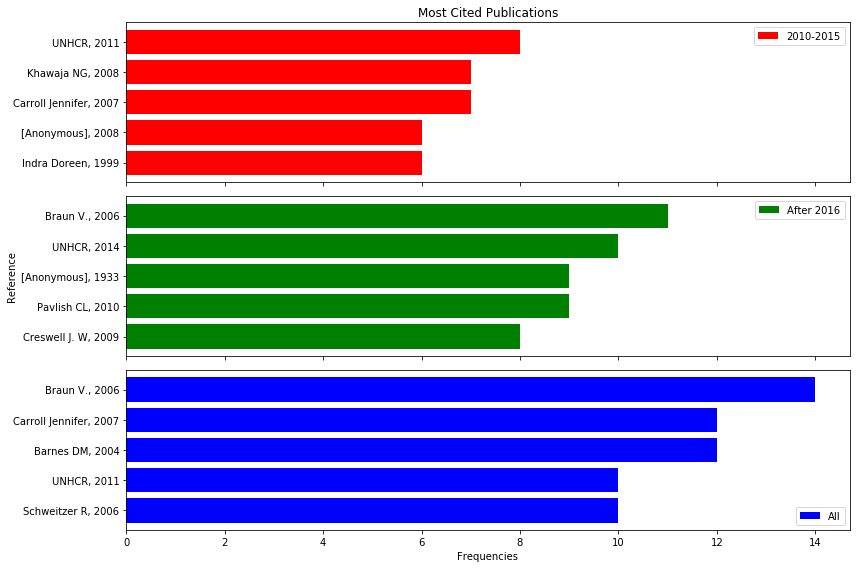

In [107]:
import matplotlib.pyplot as plt

fig, (ax_1, ax_2, ax_3) = plt.subplots(nrows=3, ncols=1, figsize=(12,8), sharex=True)

# plt.figure(figsize=(12,12))
# use plt.barh method for horizontal bar
ax_1.barh(period_1.index.get_level_values(1), period_1, color="red", label= "2010-2015")  
ax_2.barh(period_2.index.get_level_values(1), period_2, color="green", label= "After 2016")  
ax_3.barh(total.index, total, color="blue", label= "All")
# add labels
ax_2.set_ylabel("Reference")
plt.xlabel("Frequencies")

# add Title
ax_1.set_title("Most Cited Publications") 

ax_1.legend()
ax_2.legend()
ax_3.legend()

# arange padding
plt.tight_layout()

# display the plot
plt.show()